In [1]:
# Jupyter stuff
%load_ext autoreload
%autoreload 2
%autocall 1
%matplotlib inline

Automatic calling is: Smart


In [2]:
# Python libs

import numpy
import scipy
import pandas
import os
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib
import glob
import itertools
import random

import pyperclip as clip

import sys
import json

import urllib.request

import tabula
import django
from django.db.models import Q

import sklearn.preprocessing
import sklearn.cluster

import music21

In [3]:
df = pandas.read_csv('./csv/harp.csv')
_s = []
for i, row in df['PC Set'].iteritems():
    _s.append(''.join(sorted(row)))
df['Sorted'] = _s
df['Label'] = df['Prime Form'] + ' (' + df['Forte class']  + ')'
df['Label'] = df['Forte class'] + ' (' + df['Prime Form']  + ')'

## Classes de conjuntos de classes de notas

In [12]:
len(df['Forte class'].unique())

93

count    93.00
mean     23.52
std      17.31
min       1.00
25%      10.00
50%      22.00
75%      34.00
max      90.00
Name: Label, dtype: float64
            Nome Quantidade Normalizado
0  6-34 (013579)         90    3.862667
1  6-33 (023579)         80    3.281674
2  6-31 (014579)         78    3.165476
3   5-32 (01469)         56    1.887291
4  6-47 (012479)         50    1.538695
5   5-35 (02479)         45    1.248198
6   5-29 (01368)         44    1.190099
7  6-44 (012569)         44    1.190099
8   5-31 (01369)         44    1.190099
              Nome Quantidade Normalizado
81  7-17 (0124569)          5   -1.075774
82    5-17 (01348)          4   -1.133874
83     4-19 (0148)          4   -1.133874
84     4-28 (0369)          3   -1.191973
85  7-10 (0123469)          2   -1.250072
86    5-13 (01248)          2   -1.250072
87   7-9 (0123468)          2   -1.250072
88   7-6 (0123478)          2   -1.250072
89   6-37 (012348)          1   -1.308172
90     4-24 (0248)          1   

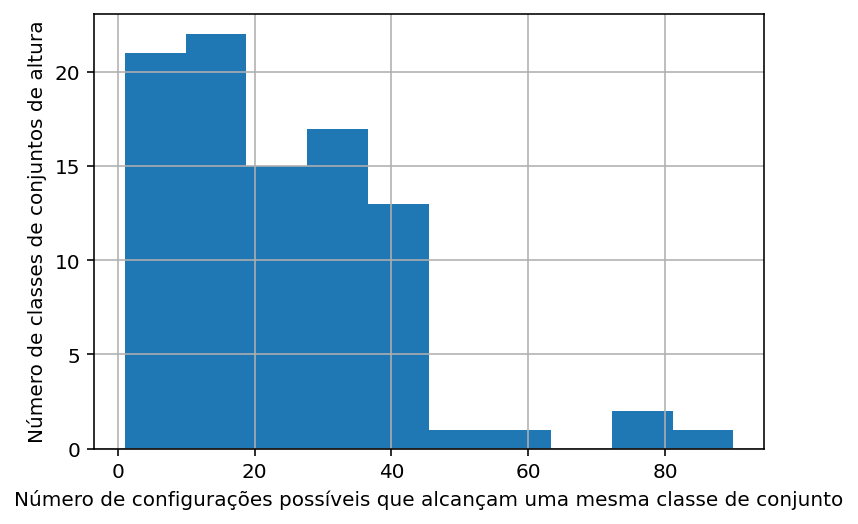

In [13]:
series = df['Label'].value_counts()
norm = scipy.stats.zscore(series.values)
_df = pandas.DataFrame([series.index, series.values, norm],
                index=['Nome', 'Quantidade', 'Normalizado']).T

print(df['Label'].value_counts().describe().round(2))
ax = _df['Quantidade'].hist()
# ax.set_title('Distribuição de ')
ax.set_xlabel('Número de configurações possíveis que alcançam uma mesma classe de conjunto')
ax.set_ylabel('Número de classes de conjuntos de altura')
print(_df[_df['Normalizado'] > 1])
print(_df[_df['Normalizado'] < -1])

In [14]:
series.describe()

count    93.000000
mean     23.516129
std      17.305197
min       1.000000
25%      10.000000
50%      22.000000
75%      34.000000
max      90.000000
Name: Label, dtype: float64

Text(0, 0.5, 'Número de configurações de pedais')

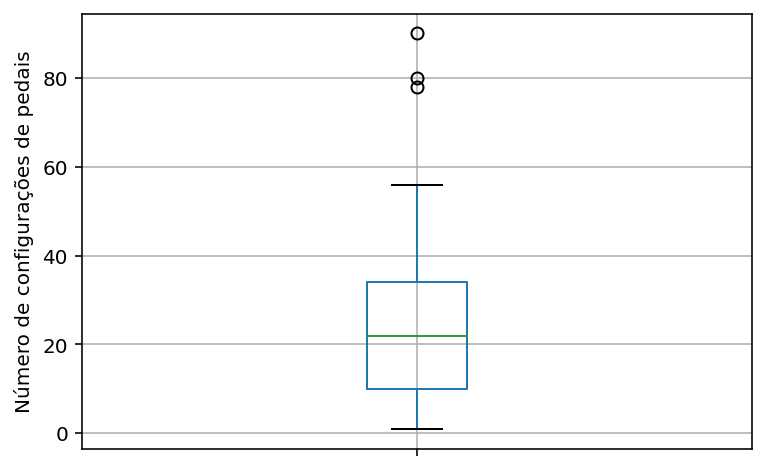

In [15]:
ax = pandas.DataFrame([_df['Quantidade'].values], index=['']).T.boxplot()
ax.set_ylabel('Número de configurações de pedais')

array([[<AxesSubplot:>]], dtype=object)

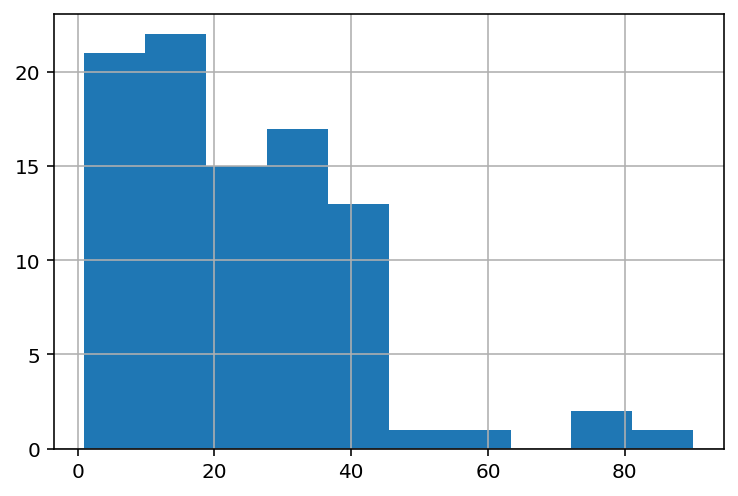

In [16]:
pandas.DataFrame([_df['Quantidade'].values], index=['']).T.hist()

In [31]:
arr = scipy.stats.zscore(series)
len(arr[(arr >= -1) & (arr < 1)])

72

In [39]:
arr = scipy.stats.zscore(series)
series[arr < -1]

7-17 (0124569)    5
4-19 (0148)       4
5-17 (01348)      4
4-28 (0369)       3
7-6 (0123478)     2
7-10 (0123469)    2
7-9 (0123468)     2
5-13 (01248)      2
6-37 (012348)     1
7-12 (0123479)    1
4-24 (0248)       1
7-8 (0234568)     1
Name: Label, dtype: int64

In [34]:
len series[(series >= 10)&(series <= 34)]

------> len(series[(series >= 10)&(series <= 34)])
------> len(series[(series >= 10)&(series <= 34)])


50

In [103]:
iqr = scipy.stats.iqr(series)
10 - iqr * 1.5

-26.0

In [226]:
universo = set([str(x) for x in  range(12)])
disposicoes_sets = [set(list(row)) for i, row in df['PC Set'].iteritems()]

def get_complemento(conjunto):
    universo = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B'}
    return universo - conjunto

def calcula(conjunto):
    complemento = get_complemento(conjunto)
    return sum([complemento.issubset(d) for d in disposicoes_sets])

In [227]:
calcula({'0', '1', '2', '3', '4', '5', '6', '7', '8', '9',})

567

In [228]:
calcula({'0', '1', '2', '4', '8'})

1

In [229]:
sum([calcula(disposicoes_sets[i]) for i in range(len(disposicoes_sets))])

21696

In [96]:
', '.join(series[series > series.mean() + series.std()].index)

'6-34 (013579), 6-33 (023579), 6-31 (014579), 5-32 (01469), 6-47 (012479), 5-35 (02479), 6-44 (012569), 5-29 (01368), 5-31 (01369)'

6-34 (013579)    90
6-33 (023579)    80
6-31 (014579)    78
5-32 (01469)     56
6-47 (012479)    50
5-35 (02479)     45
5-29 (01368)     44
6-44 (012569)    44
5-31 (01369)     44
Name: Label, dtype: int64


Text(0, 0.5, 'Número de configurações possíveis')

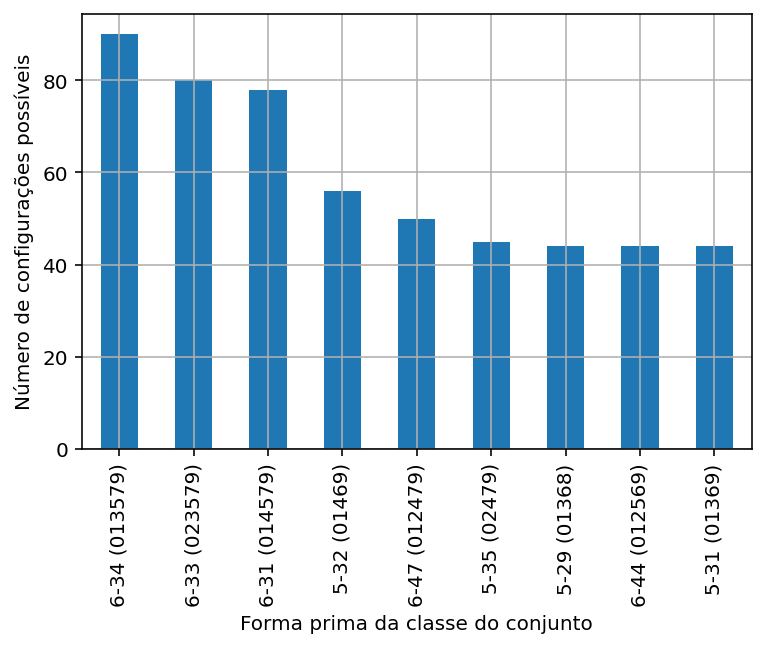

In [8]:
print(df['Label'].value_counts()[:9])
ax = df['Label'].value_counts()[:9].plot(kind='bar', grid=True)
# ax.set_title('Ocorrências de classes de conjuntos (desvio > 1)')
ax.set_xlabel('Forma prima da classe do conjunto')
ax.set_ylabel('Número de configurações possíveis')

Text(0, 0.5, 'Número de configurações possíveis')

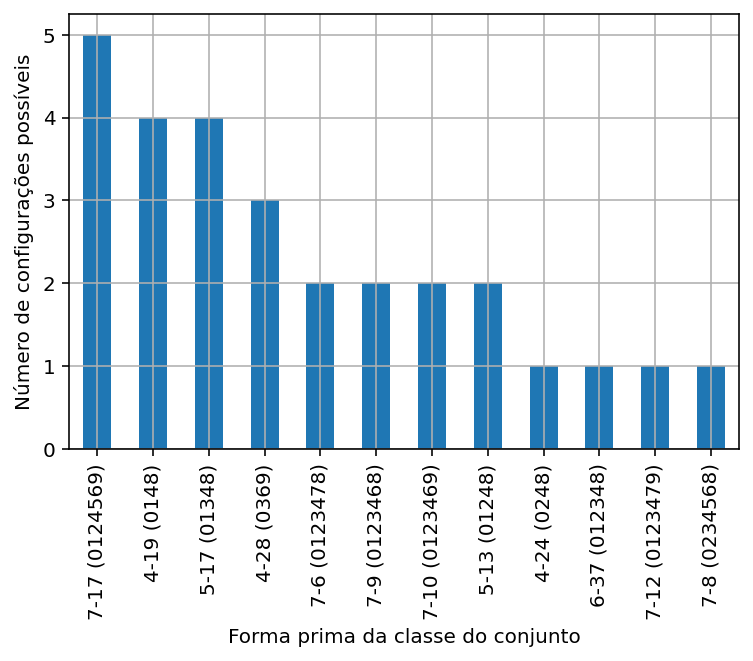

In [9]:
ax = df['Label'].value_counts()[-12:].plot(kind='bar', grid=True)
# ax.set_title('Ocorrências de classes de conjuntos (desvio < -1)')
ax.set_xlabel('Forma prima da classe do conjunto')
ax.set_ylabel('Número de configurações possíveis')

Text(0, 0.5, 'Número de disposições')

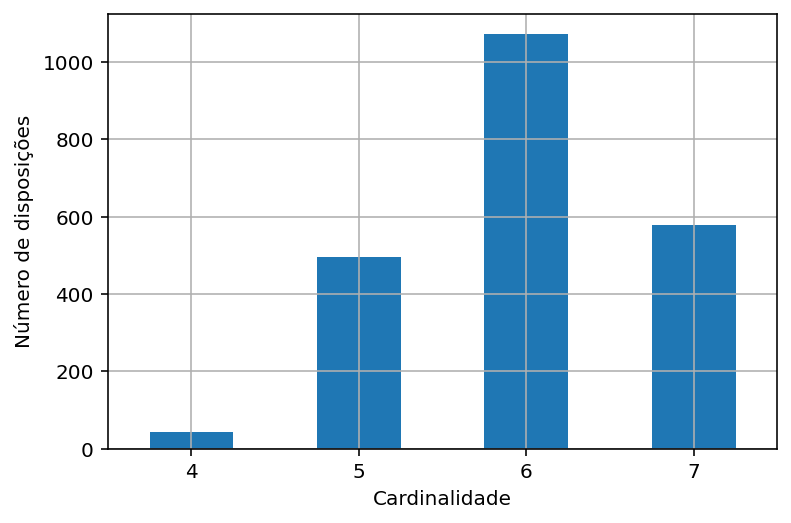

In [16]:
# ax = df['Prime Form'].apply(len).hist()
ax = df['Prime Form'].apply(len).value_counts().sort_index().plot(kind='bar', grid=True)
# ax.set_title('Ocorrências de conjuntos por tamanho')
plt.xticks(rotation=0)
ax.set_xlabel('Cardinalidade')
ax.set_ylabel('Número de configurações')


In [87]:
print(df[df['Prime Form'].apply(len) == 4]['Label'].unique())

['0358 (4-26)' '0258 (4-27)' '0369 (4-28)' '0158 (4-20)' '0148 (4-19)'
 '0248 (4-24)']


In [120]:
PMAP = list('0123456789AB')
def make_pcset(seq):
    new = [PMAP[el] for el in seq]
    return ''.join(sorted(new))
    

def make_transpositions(pcset):
    arr = numpy.array(pcset)
    return [make_pcset(((arr + i) % 12).tolist()) for i in range(12)]


def get_settings_by_pcset_transpositions(pcset):
    transpositions = make_transpositions(pcset)
    
    seq = []
    
    for _pcset in transp:
        _df = df[df['Sorted']==_pcset]
        if len(_df) > 0:
            for _, r in _df.iterrows():
                seq.append(r.values)
    return pandas.DataFrame(seq, columns=df.columns)

In [121]:
transp = make_transpositions([1, 3, 4, 6, 8, 10, 11])

In [122]:
get_settings_by_pcset_transpositions([1, 3, 4, 6, 8, 10, 11])

,Index,Notes (scalar),Notes (radial),PC Set,Prime Form,Forte class,Accidents,1,2,3,4,5,6,Sorted
0,0,Cb Db Eb Fb Gb Ab Bb,Db Cb Bb Eb Fb Gb Ab,B13468A,013568A,7-35,"(0, 0, 0, 0, 0, 0, 0)",2,5,4,3,6,1,13468AB
1,2212221,C# D# En F# G# A# Bn,D# C# Bn En F# G# A#,13468AB,013568A,7-35,"(2, 2, 1, 2, 2, 2, 1)",2,5,4,3,6,1,13468AB
2,111112,Cb Dn En Fn Gn An B#,Dn Cb B# En Fn Gn An,B245790,013568A,7-35,"(0, 1, 1, 1, 1, 1, 2)",2,5,4,3,6,1,024579B
3,120112,Cb Dn E# Fb Gn An B#,Dn Cb B# E# Fb Gn An,B254790,013568A,7-35,"(0, 1, 2, 0, 1, 1, 2)",2,5,4,3,6,1,024579B
4,1111111,Cn Dn En Fn Gn An Bn,Dn Cn Bn En Fn Gn An,024579B,013568A,7-35,"(1, 1, 1, 1, 1, 1, 1)",2,5,4,3,6,1,024579B
5,1120111,Cn Dn E# Fb Gn An Bn,Dn Cn Bn E# Fb Gn An,025479B,013568A,7-35,"(1, 1, 2, 0, 1, 1, 1)",2,5,4,3,6,1,024579B
6,1001000,Cn Db Eb Fn Gb Ab Bb,Db Cn Bb Eb Fn Gb Ab,013568A,013568A,7-35,"(1, 0, 0, 1, 0, 0, 0)",2,5,4,3,6,1,013568A
7,2222222,C# D# E# F# G# A# B#,D# C# B# E# F# G# A#,13568A0,013568A,7-35,"(2, 2, 2, 2, 2, 2, 2)",2,5,4,3,6,1,013568A
8,2112111,C# Dn En F# Gn An Bn,Dn C# Bn En F# Gn An,124679B,013568A,7-35,"(2, 1, 1, 2, 1, 1, 1)",2,5,4,3,6,1,124679B
9,1101100,Cn Dn Eb Fn Gn Ab Bb,Dn Cn Bb Eb Fn Gn Ab,023578A,013568A,7-35,"(1, 1, 0, 1, 1, 0, 0)",2,5,4,3,6,1,023578A


<AxesSubplot:>

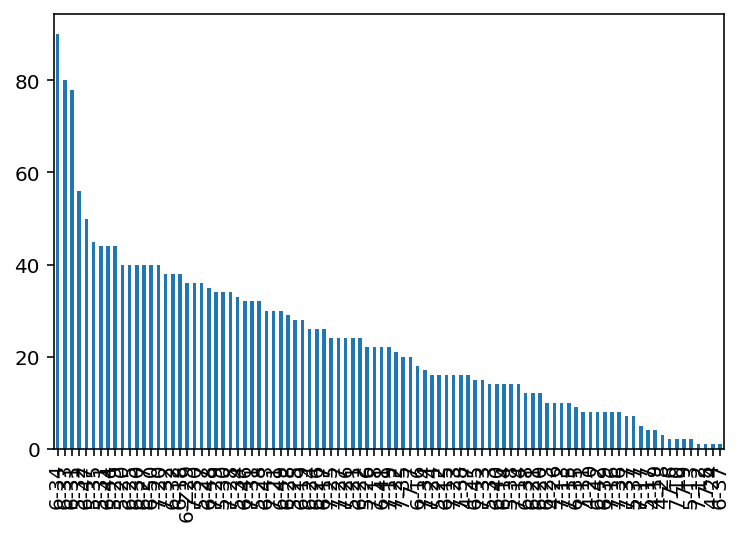

In [127]:
df['Forte class'].value_counts().plot(kind='bar')

In [125]:
for label, _df in df.groupby('Forte class'):
    print(label)
    print(_df)

4-19
        Index        Notes (scalar)        Notes (radial)   PC Set Prime Form  \
830   1010202  Cn Db En Fb G# Ab B#  Db Cn B# En Fb G# Ab  0144880       0148   
1235  1200202  Cn D# Eb Fb G# Ab B#  D# Cn B# Eb Fb G# Ab  0334880       0148   
1316  1210202  Cn D# En Fb G# Ab B#  D# Cn B# En Fb G# Ab  0344880       0148   
1559  2010202  C# Db En Fb G# Ab B#  Db C# B# En Fb G# Ab  1144880       0148   

     Forte class              Accidents  1  2  3  4  5  6   Sorted  
830         4-19  (1, 0, 1, 0, 2, 0, 2)  1  0  1  3  1  0  0014488  
1235        4-19  (1, 2, 0, 0, 2, 0, 2)  1  0  1  3  1  0  0033488  
1316        4-19  (1, 2, 1, 0, 2, 0, 2)  1  0  1  3  1  0  0034488  
1559        4-19  (2, 0, 1, 0, 2, 0, 2)  1  0  1  3  1  0  0114488  
4-20
        Index        Notes (scalar)        Notes (radial)   PC Set Prime Form  \
505    200201  Cb D# Eb Fb G# Ab Bn  D# Cb Bn Eb Fb G# Ab  B33488B       0158   
546    202020  Cb D# Eb F# Gb A# Bb  D# Cb Bb Eb F# Gb A#  B3366AA       0158

2184        6-32  (2, 2, 2, 2, 2, 2, 0)  1  4  3  2  5  0  13568AA  
6-33
        Index        Notes (scalar)        Notes (radial)   PC Set Prime Form  \
4          11  Cb Db Eb Fb Gb An Bn  Db Cb Bn Eb Fb Gb An  B13469B     023579   
28       1001  Cb Db Eb Fn Gb Ab Bn  Db Cb Bn Eb Fn Gb Ab  B13568B     023579   
45       1200  Cb Db Eb Fn G# Ab Bb  Db Cb Bb Eb Fn G# Ab  B13588A     023579   
51       1220  Cb Db Eb Fn G# A# Bb  Db Cb Bb Eb Fn G# A#  B1358AA     023579   
52       1221  Cb Db Eb Fn G# A# Bn  Db Cb Bn Eb Fn G# A#  B1358AB     023579   
...       ...                   ...                   ...      ...        ...   
2142  2221100  C# D# E# Fn Gn Ab Bb  D# C# Bb E# Fn Gn Ab  135578A     023579   
2150  2221122  C# D# E# Fn Gn A# B#  D# C# B# E# Fn Gn A#  13557A0     023579   
2158  2221221  C# D# E# Fn G# A# Bn  D# C# Bn E# Fn G# A#  13558AB     023579   
2161  2222001  C# D# E# F# Gb Ab Bn  D# C# Bn E# F# Gb Ab  135668B     023579   
2179  2222201  C# D# E# F# G# Ab Bn

2114        7-36  (2, 2, 2, 0, 0, 2, 2)  4  4  4  3  4  2  013456A  
7-37
        Index        Notes (scalar)        Notes (radial)   PC Set Prime Form  \
23        212  Cb Db Eb Fb G# An B#  Db Cb B# Eb Fb G# An  B134890    0134578   
630    212100  Cb D# En F# Gn Ab Bb  D# Cb Bb En F# Gn Ab  B34678A    0134578   
751   1000211  Cn Db Eb Fb G# An Bn  Db Cn Bn Eb Fb G# An  013489B    0134578   
966   1022210  Cn Db E# F# G# An Bb  Db Cn Bb E# F# G# An  015689A    0134578   
1735  2101021  C# Dn Eb Fn Gb A# Bn  Dn C# Bn Eb Fn Gb A#  12356AB    0134578   
2063  2211102  C# D# En Fn Gn Ab B#  D# C# B# En Fn Gn Ab  1345780    0134578   
2117  2220102  C# D# E# Fb Gn Ab B#  D# C# B# E# Fb Gn Ab  1354780    0134578   

     Forte class              Accidents  1  2  3  4  5  6   Sorted  
23          7-37  (0, 0, 0, 0, 2, 1, 2)  4  3  4  5  4  1  013489B  
630         7-37  (0, 2, 1, 2, 1, 0, 0)  4  3  4  5  4  1  34678AB  
751         7-37  (1, 0, 0, 0, 2, 1, 1)  4  3  4  5  4  1  013489B  
9

<AxesSubplot:>

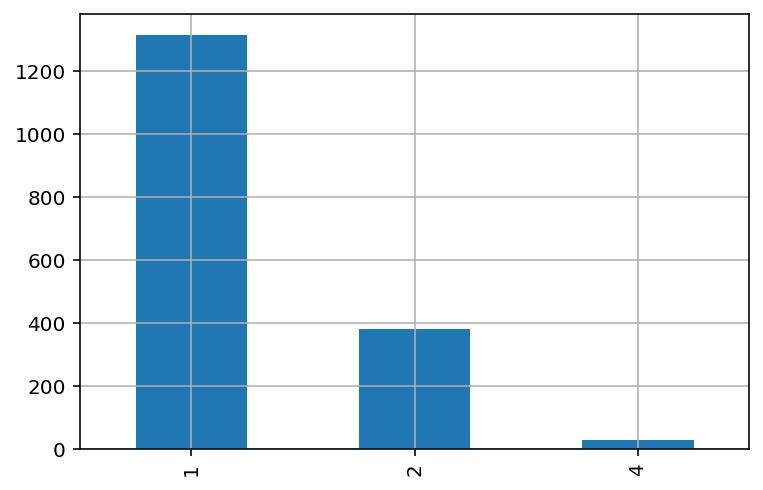

In [24]:
df['Sorted'].value_counts().value_counts().sort_index().plot(kind='bar', grid=True)#.hist()#.plot(kind='bar')

In [47]:
transp

['13468AB',
 '024579B',
 '013568A',
 '124679B',
 '023578A',
 '134689B',
 '024579A',
 '13568AB',
 '024679B',
 '013578A',
 '124689B',
 '023579A']

In [51]:
for pcset in transp:
    i = 0
    _df = df[df['Sorted']==pcset]
    if len(_df) > 0:
        print(pcset)
        print(len(_df))

13468AB
2
024579B
4
013568A
2
124679B
1
023578A
1
134689B
1
024579A
2
13568AB
2
024679B
2
013578A
1
124689B
1
023579A
1


In [26]:
_s = []
for i, row in df['PCa Set'].iteritems():
    _s.append(''.join(sorted(row)))
df['Sorted'] = _s

13468AB
13468BB
013468B
13469AB
13469BB
013469B
1346AAB
1346ABB
01346AB
13478AB
13478BB
013478B
13479AB
13479BB
013479B
1347AAB
1347ABB
01347AB
13488AB
13488BB
013488B
13489AB
13489BB
013489B
1348AAB
1348ABB
01348AB
13568AB
13568BB
013568B
13569AB
13569BB
013569B
1356AAB
1356ABB
01356AB
13578AB
13578BB
013578B
13579AB
13579BB
013579B
1357AAB
1357ABB
01357AB
13588AB
13588BB
013588B
13589AB
13589BB
013589B
1358AAB
1358ABB
01358AB
13668AB
13668BB
013668B
13669AB
13669BB
013669B
1366AAB
1366ABB
01366AB
13678AB
13678BB
013678B
13679AB
13679BB
013679B
1367AAB
1367ABB
01367AB
13688AB
13688BB
013688B
13689AB
13689BB
013689B
1368AAB
1368ABB
01368AB
14468AB
14468BB
014468B
14469AB
14469BB
014469B
1446AAB
1446ABB
01446AB
14478AB
14478BB
014478B
14479AB
14479BB
014479B
1447AAB
1447ABB
01447AB
14488AB
14488BB
014488B
14489AB
14489BB
014489B
1448AAB
1448ABB
01448AB
14568AB
14568BB
014568B
14569AB
14569BB
014569B
1456AAB
1456ABB
01456AB
14578AB
14578BB
014578B
14579AB
14579BB
014579B
1457AAB
1457ABB


114469A
114469B
0114469
11446AA
11446AB
011446A
114478A
114478B
0114478
114479A
114479B
0114479
11447AA
11447AB
011447A
114488A
114488B
0114488
114489A
114489B
0114489
11448AA
11448AB
011448A
114568A
114568B
0114568
114569A
114569B
0114569
11456AA
11456AB
011456A
114578A
114578B
0114578
114579A
114579B
0114579
11457AA
11457AB
011457A
114588A
114588B
0114588
114589A
114589B
0114589
11458AA
11458AB
011458A
114668A
114668B
0114668
114669A
114669B
0114669
11466AA
11466AB
011466A
114678A
114678B
0114678
114679A
114679B
0114679
11467AA
11467AB
011467A
114688A
114688B
0114688
114689A
114689B
0114689
11468AA
11468AB
011468A
114568A
114568B
0114568
114569A
114569B
0114569
11456AA
11456AB
011456A
114578A
114578B
0114578
114579A
114579B
0114579
11457AA
11457AB
011457A
114588A
114588B
0114588
114589A
114589B
0114589
11458AA
11458AB
011458A
115568A
115568B
0115568
115569A
115569B
0115569
11556AA
11556AB
011556A
115578A
115578B
0115578
115579A
115579B
0115579
11557AA
11557AB
011557A
115588A
115588B


In [4]:
notas = list('CDEFGAB')

combinations = list(itertools.product(['b', 'n', '#'], repeat=7))
combinations_as_numbers = list(itertools.product([-1, 0, 1], repeat=7))
pitches = numpy.array([0, 2, 4, 5, 7, 9, 1])

In [5]:
COMBINACOES = list(itertools.product([-1, 0, 1], repeat=7))
NOMES_NOTAS = list('CDEFGAB')
ACIDENTES = list('bn#')
NOTAS = numpy.array([0, 2, 4, 5, 7, 9, 11])

class Disposicao(object):
    def __init__(self, n, alteracoes):
        self.n = n
        self.alteracoes = alteracoes
        self.notas_str = ' '.join(['{}{}'.format(a, ACIDENTES[b + 1])
                                   for a, b in zip(NOMES_NOTAS, alteracoes)])
        self.pitches = (NOTAS + numpy.array(alteracoes)) % 12
        ch = music21.chord.Chord(self.pitches.tolist())
        self.prime = ch.primeForm
        self.prime_str = ch.primeFormString
        
    def __repr__(self):
        return '<D: {}. {}>'.format(str(self.n), self.notas_str)

In [6]:
disposicoes = [Disposicao(i + 1, comb) for i, comb in enumerate(COMBINACOES)]

In [13]:
pandas.Series([d.prime_str for d in disposicoes]).value_counts()[:20]

<013579>     90
<023579>     80
<013589>     78
<01469>      56
<012479>     50
<02479>      45
<01369>      44
<01368>      44
<012569>     44
<013469>     40
<0124789>    40
<013679>     40
<013568>     40
<014679>     40
<01378>      40
<0134689>    38
<024579>     38
<012578>     38
<013689>     36
<01358>      36
dtype: int64

In [3]:
ch = music21.chord.Chord([2, 3, 4])
ch

<music21.chord.Chord D E- E>

In [4]:
ch.primeFormString

<music21.chord.Chord D E- E>

In [51]:
numpy.array([0, 1]).tolist()

[0, 1]

In [50]:
ch.primeForm

[0, 1, 2]

In [17]:
combinations

[('b', 'b', 'b', 'b', 'b', 'b', 'b'),
 ('b', 'b', 'b', 'b', 'b', 'b', 'n'),
 ('b', 'b', 'b', 'b', 'b', 'b', '#'),
 ('b', 'b', 'b', 'b', 'b', 'n', 'b'),
 ('b', 'b', 'b', 'b', 'b', 'n', 'n'),
 ('b', 'b', 'b', 'b', 'b', 'n', '#'),
 ('b', 'b', 'b', 'b', 'b', '#', 'b'),
 ('b', 'b', 'b', 'b', 'b', '#', 'n'),
 ('b', 'b', 'b', 'b', 'b', '#', '#'),
 ('b', 'b', 'b', 'b', 'n', 'b', 'b'),
 ('b', 'b', 'b', 'b', 'n', 'b', 'n'),
 ('b', 'b', 'b', 'b', 'n', 'b', '#'),
 ('b', 'b', 'b', 'b', 'n', 'n', 'b'),
 ('b', 'b', 'b', 'b', 'n', 'n', 'n'),
 ('b', 'b', 'b', 'b', 'n', 'n', '#'),
 ('b', 'b', 'b', 'b', 'n', '#', 'b'),
 ('b', 'b', 'b', 'b', 'n', '#', 'n'),
 ('b', 'b', 'b', 'b', 'n', '#', '#'),
 ('b', 'b', 'b', 'b', '#', 'b', 'b'),
 ('b', 'b', 'b', 'b', '#', 'b', 'n'),
 ('b', 'b', 'b', 'b', '#', 'b', '#'),
 ('b', 'b', 'b', 'b', '#', 'n', 'b'),
 ('b', 'b', 'b', 'b', '#', 'n', 'n'),
 ('b', 'b', 'b', 'b', '#', 'n', '#'),
 ('b', 'b', 'b', 'b', '#', '#', 'b'),
 ('b', 'b', 'b', 'b', '#', '#', 'n'),
 ('b', 'b', 

## Análise de intervalos

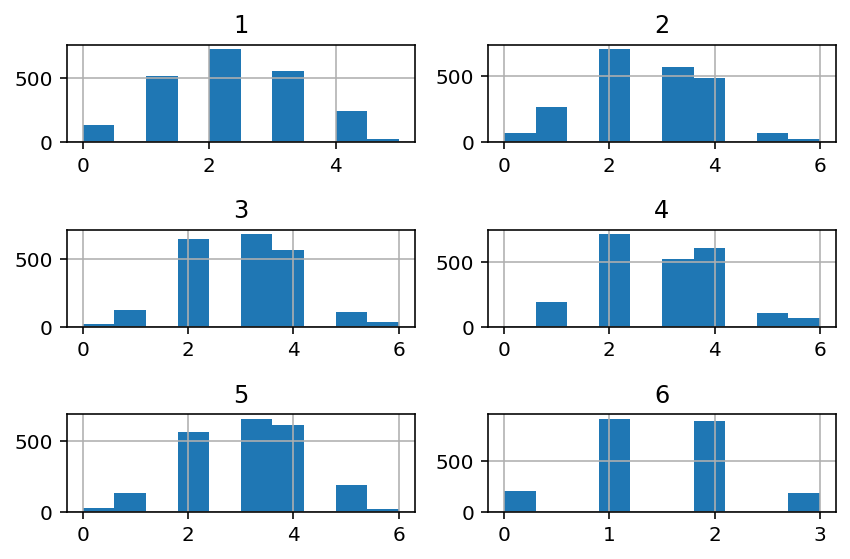

In [13]:
df[[str(i) for i in range(1, 7)]].hist()
plt.tight_layout()

Text(0, 0.5, 'Número de ocorrências do intervalo\nno vetor classe-intervalar')

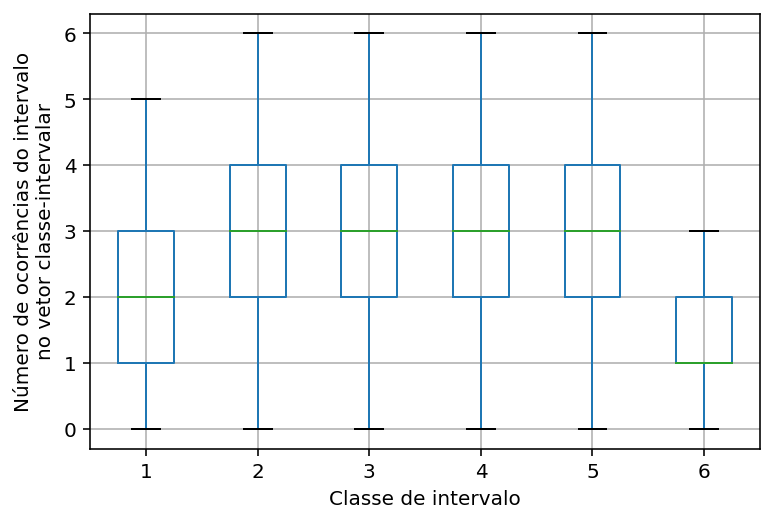

In [17]:
ax = df[[str(i) for i in range(1, 7)]].boxplot()
ax.set_xlabel('Classe de intervalo')
ax.set_ylabel('Número de ocorrências do intervalo\nno vetor classe-intervalar')


In [28]:
df[[str(i) for i in range(1, 7)]].apply(lambda x: x.value_counts(True)).round(3) * 100

,1,2,3,4,5,6
0,6.0,3.1,1.1,0.1,1.2,9.2
1,23.6,12.0,5.7,8.6,6.0,41.7
2,33.0,32.2,29.5,32.4,25.7,40.7
3,25.4,26.0,31.3,23.7,29.8,8.3
4,11.0,22.3,25.8,27.4,27.8,NaN
5,1.0,3.3,5.1,4.7,8.5,NaN
6,NaN,1.1,1.5,3.0,0.9,NaN


In [39]:
df[[str(i) for i in range(1, 7)]].apply(lambda x: x.value_counts(True)).T.describe()

,0,1,2,3,4,5,6
count,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,4.000000
mean,0.034598,0.162628,0.322664,0.240969,0.228715,0.045267,0.016232
std,0.035071,0.141073,0.049718,0.082296,0.070048,0.027446,0.009573
min,0.001372,0.056699,0.256516,0.083219,0.109739,0.010059,0.009145
25%,0.011317,0.066644,0.302126,0.241541,0.222679,0.032922,0.010517
50%,0.021491,0.102881,0.323274,0.257202,0.258345,0.047096,0.012803
75%,0.052583,0.207019,0.328647,0.288637,0.274348,0.051212,0.018519
max,0.092364,0.417010,0.407407,0.312757,0.278464,0.085048,0.030178


In [34]:
df[[str(i) for i in range(1, 7)]].describe().round(2).T[['mean', 'std', '50%']].T

,1,2,3,4,5,6
mean,2.15,2.67,2.96,2.96,3.06,1.48
std,1.11,1.19,1.10,1.19,1.14,0.78
50%,2.00,3.00,3.00,3.00,3.00,1.00


## Geração de equações

In [15]:
a = [1, 2, 3]
b = [4, 5]
c = [6, 7]

print(','.join([str(set(t)).replace(' ', '').replace('{', '\{').replace('}', '\}')
          for t in itertools.product(a, b, c)]))

\{1,4,6\},\{1,4,7\},\{1,5,6\},\{1,5,7\},\{2,4,6\},\{2,4,7\},\{2,5,6\},\{2,5,7\},\{3,4,6\},\{3,4,7\},\{3,5,6\},\{3,5,7\}


In [6]:
pools = [tuple(pool) for pool in list('bn#')] * 7
pools

[('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',),
 ('b',),
 ('n',),
 ('#',)]

In [10]:
from itertools import product
list(product(["b", "n", "#"], repeat=7))

[('b', 'b', 'b', 'b', 'b', 'b', 'b'),
 ('b', 'b', 'b', 'b', 'b', 'b', 'n'),
 ('b', 'b', 'b', 'b', 'b', 'b', '#'),
 ('b', 'b', 'b', 'b', 'b', 'n', 'b'),
 ('b', 'b', 'b', 'b', 'b', 'n', 'n'),
 ('b', 'b', 'b', 'b', 'b', 'n', '#'),
 ('b', 'b', 'b', 'b', 'b', '#', 'b'),
 ('b', 'b', 'b', 'b', 'b', '#', 'n'),
 ('b', 'b', 'b', 'b', 'b', '#', '#'),
 ('b', 'b', 'b', 'b', 'n', 'b', 'b'),
 ('b', 'b', 'b', 'b', 'n', 'b', 'n'),
 ('b', 'b', 'b', 'b', 'n', 'b', '#'),
 ('b', 'b', 'b', 'b', 'n', 'n', 'b'),
 ('b', 'b', 'b', 'b', 'n', 'n', 'n'),
 ('b', 'b', 'b', 'b', 'n', 'n', '#'),
 ('b', 'b', 'b', 'b', 'n', '#', 'b'),
 ('b', 'b', 'b', 'b', 'n', '#', 'n'),
 ('b', 'b', 'b', 'b', 'n', '#', '#'),
 ('b', 'b', 'b', 'b', '#', 'b', 'b'),
 ('b', 'b', 'b', 'b', '#', 'b', 'n'),
 ('b', 'b', 'b', 'b', '#', 'b', '#'),
 ('b', 'b', 'b', 'b', '#', 'n', 'b'),
 ('b', 'b', 'b', 'b', '#', 'n', 'n'),
 ('b', 'b', 'b', 'b', '#', 'n', '#'),
 ('b', 'b', 'b', 'b', '#', '#', 'b'),
 ('b', 'b', 'b', 'b', '#', '#', 'n'),
 ('b', 'b', 

In [9]:
# base 10
from itertools import product

acidentes = ['b', 'n', '#']
notas = 'Dó Ré Mi Fá Sol Lá Si'.split()
lista = []

for i, d in enumerate(product(acidentes, repeat=7)):
    configuracao = ''.join(a + n for a, n in zip(notas, d))
    lista.append('{} - {}'.format(str(i + 1), configuracao))

print('\n'.join(lista))

2185 - Dó#Ré#Mi#Fá#Sol#Lá#Sib
2186 - Dó#Ré#Mi#Fá#Sol#Lá#Sin
2187 - Dó#Ré#Mi#Fá#Sol#Lá#Si#


In [11]:
# base 3
from itertools import product

def conversor(n):
    if n == 0:
        return '0'
    v = ''
    while n > 0:
        v = str(n % 3) + v
        n //= 3
    return v

acidentes = ['b', 'n', '#']
notas = 'Dó Ré Mi Fá Sol Lá Si'.split()
lista = []

i = 0
for d in product(acidentes, repeat=7):
    configuracao = ''.join(a + n for a, n in zip(notas, d))
    i3 = conversor(i)
    lista.append('{} - {}'.format(i3, configuracao))
    i += 1

print('\n'.join(lista[-3:]))

2222220 - Dó#Ré#Mi#Fá#Sol#Lá#Sib
2222221 - Dó#Ré#Mi#Fá#Sol#Lá#Sin
2222222 - Dó#Ré#Mi#Fá#Sol#Lá#Si#


In [4]:
p = ['b', 'n', '#']
for i in range(7):
    for j in range(3):
        print(p[j])

b
n
#
b
n
#
b
n
#
b
n
#
b
n
#
b
n
#
b
n
#


In [35]:
max([len(x) for x in df['Prime Form'].unique()])

7

In [37]:
max(df['Prime Form'].apply(len))


7

In [19]:
unicos = {el: 0 for el in df.Sorted.unique()}
for _, el in df.Sorted.iteritems():
    unicos[el] += 1
unicos = pandas.Series(unicos)
unicos

13468AB    2
13468BB    1
013468B    2
13469AB    1
13469BB    1
          ..
0135688    1
135689A    1
135689B    1
0135689    1
13568AA    1
Length: 1724, dtype: int64

In [20]:
unicos.value_counts()

1    1315
2     382
4      27
dtype: int64

Text(0, 0.5, 'Número de conjuntos distintos\nalcançados por disposições de pedais')

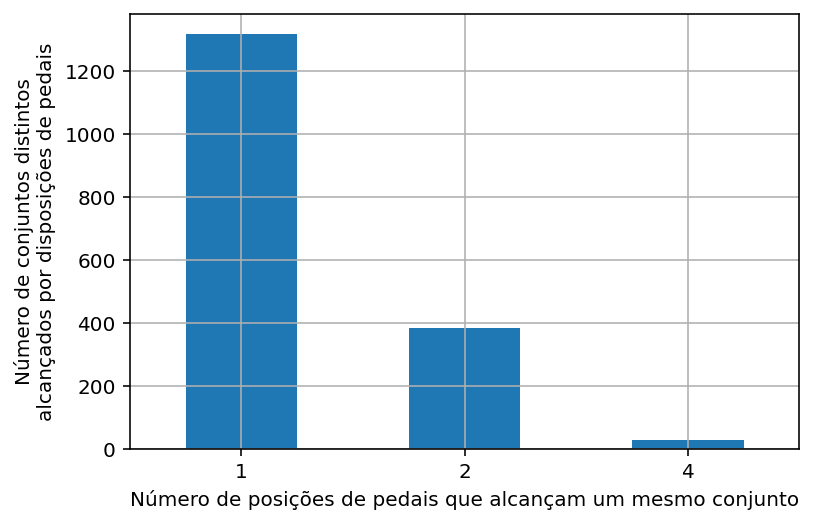

In [60]:
ax = unicos.value_counts().sort_index().plot(kind='bar', grid=True)
plt.xticks(rotation=0)
ax.set_xlabel('Número de posições de pedais que alcançam um mesmo conjunto')
ax.set_ylabel('Número de conjuntos distintos\nalcançados por configurações de pedais')


In [61]:
len(df.Sorted.unique())

1724

In [65]:
unicos.sum()

2187

In [13]:
print(df[df['1'] == 5][['Index', 'PC Set']])

        Index   PC Set
116     11022  B1456A0
170     20022  B1546A0
227     22102  B156780
233     22122  B1567A0
264    100210  B23489A
597    211010  B34569A
602    211022  B3456A0
615    211210  B34589A
651    220010  B35469A
656    220022  B3546A0
669    220210  B35489A
844   1011021  01456AB
898   1020021  01546AB
955   1022101  015678B
961   1022121  01567AB
1330  1211021  03456AB
1384  1220021  03546AB
1712  2100102  1234780
1722  2100210  123489A
1724  2100212  1234890
1766  2102102  1236780
1928  2122102  1256780


In [26]:
df[df['Prime Form']=='0369']

,Index,Notes (scalar),Notes (radial),PC Set,Prime Form,Forte class,Accidents,1,2,3,4,5,6,Sorted,Label
451,121201,Cb Dn E# Fn G# Ab Bn,Dn Cb Bn E# Fn G# Ab,B25588B,0369,4-28,"(0, 1, 2, 1, 2, 0, 1)",0,0,4,0,0,2,25588BB,4-28 (0369)
1274,1202012,Cn D# Eb F# Gb An B#,D# Cn B# Eb F# Gb An,0336690,0369,4-28,"(1, 2, 0, 2, 0, 1, 2)",0,0,4,0,0,2,0033669,4-28 (0369)
1554,2010120,C# Db En Fb Gn A# Bb,Db C# Bb En Fb Gn A#,11447AA,0369,4-28,"(2, 0, 1, 0, 1, 2, 0)",0,0,4,0,0,2,11447AA,4-28 (0369)


In [58]:
df[df['Forte class'].str.startswith('4')]['Prime Form'].value_counts()

0258    16
0358    10
0158     8
0148     4
0369     3
0248     1
Name: Prime Form, dtype: int64

In [57]:
df[df['Prime Form']=='0258']['PC Set'].apply(lambda x: ''.join(sorted(set(x)))).value_counts()

148A    2
158B    2
0368    2
146A    2
036A    2
358B    2
248B    1
0258    1
157A    1
369B    1
Name: PC Set, dtype: int64

In [79]:
x = pandas.DataFrame(df['Prime Form'])
x['Card'] = x['Prime Form'].apply(len)
x

,Prime Form,Card
0,013568A,7
1,024579,6
2,0124579,7
3,0124679,7
4,023579,6
...,...,...
2182,013468A,7
2183,0134689,7
2184,024579,6
2185,013568A,7


In [94]:
for l, g in x.groupby('Card'):
    z = g['Prime Form'].apply(lambda x: ''.join(sorted(set(x)))).value_counts()
    print(l, len(z))

4 6
5 18
6 36
7 33
